https://www.kaggle.com/swapniljena/disease-prediction-random-forest-100-acc

https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/

https://www.machinelearningplus.com/pandas/pandas-pivot-table-in-python/

https://www.geeksforgeeks.org/python-pandas-pivot_table/

https://www.examplefiles.net/cs/529361

In [1]:
import numpy as np
import pandas as pd 
import pandas as pd
import os
import pickle
import category_encoders as ce
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_symptom = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/dataset.csv')

In [3]:
df_symptom.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_symptom['Disease'].nunique()

41

In [5]:
df_description = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/symptom_Description.csv')

In [6]:
df_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [7]:
df_precaution = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/symptom_precaution.csv')

In [8]:
df_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [9]:
df_severity = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/Symptom-severity.csv')

In [10]:
df_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [11]:
len(df_symptom['Disease'].unique())


41

In [12]:
df_symptom['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
# disease = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
#        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
#        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
#        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
#        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
#        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
#        'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
#        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
#        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
#        'Osteoarthristis', 'Arthritis',
#        '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
#        'Urinary tract infection', 'Psoriasis', 'Impetigo']

In [14]:
# get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df_symptom.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

#### Label Encoding


https://pbpython.com/categorical-encoding.html

In [15]:

df_symptom["Symptom_1"] = df_symptom["Symptom_1"].astype('category')
df_symptom["Symptom_2"] = df_symptom["Symptom_2"].astype('category')
df_symptom["Symptom_3"] = df_symptom["Symptom_3"].astype('category')
df_symptom["Symptom_4"] = df_symptom["Symptom_4"].astype('category')
df_symptom["Symptom_5"] = df_symptom["Symptom_5"].astype('category')
df_symptom["Symptom_6"] = df_symptom["Symptom_6"].astype('category')
df_symptom["Symptom_7"] = df_symptom["Symptom_7"].astype('category')
df_symptom["Symptom_8"] = df_symptom["Symptom_8"].astype('category')
df_symptom["Symptom_9"] = df_symptom["Symptom_9"].astype('category')
df_symptom["Symptom_10"] = df_symptom["Symptom_10"].astype('category')
df_symptom["Symptom_11"] = df_symptom["Symptom_11"].astype('category')
df_symptom["Symptom_12"] = df_symptom["Symptom_12"].astype('category')
df_symptom["Symptom_13"] = df_symptom["Symptom_13"].astype('category')
df_symptom["Symptom_14"] = df_symptom["Symptom_14"].astype('category')
df_symptom["Symptom_15"] = df_symptom["Symptom_15"].astype('category')
df_symptom["Symptom_16"] = df_symptom["Symptom_16"].astype('category')
df_symptom["Symptom_17"] = df_symptom["Symptom_17"].astype('category')
df_symptom.dtypes

Disease         object
Symptom_1     category
Symptom_2     category
Symptom_3     category
Symptom_4     category
Symptom_5     category
Symptom_6     category
Symptom_7     category
Symptom_8     category
Symptom_9     category
Symptom_10    category
Symptom_11    category
Symptom_12    category
Symptom_13    category
Symptom_14    category
Symptom_15    category
Symptom_16    category
Symptom_17    category
dtype: object

In [16]:

df_symptom["Symptom_01"] = df_symptom["Symptom_1"].cat.codes
df_symptom["Symptom_02"] = df_symptom["Symptom_2"].cat.codes
df_symptom["Symptom_03"] = df_symptom["Symptom_3"].cat.codes
df_symptom["Symptom_04"] = df_symptom["Symptom_4"].cat.codes
df_symptom["Symptom_05"] = df_symptom["Symptom_5"].cat.codes
df_symptom["Symptom_06"] = df_symptom["Symptom_6"].cat.codes
df_symptom["Symptom_07"] = df_symptom["Symptom_7"].cat.codes
df_symptom["Symptom_08"] = df_symptom["Symptom_8"].cat.codes
df_symptom["Symptom_09"] = df_symptom["Symptom_9"].cat.codes
df_symptom["Symptom_010"] = df_symptom["Symptom_10"].cat.codes
df_symptom["Symptom_011"] = df_symptom["Symptom_11"].cat.codes
df_symptom["Symptom_012"] = df_symptom["Symptom_12"].cat.codes
df_symptom["Symptom_013"] = df_symptom["Symptom_13"].cat.codes
df_symptom["Symptom_014"] = df_symptom["Symptom_14"].cat.codes
df_symptom["Symptom_015"] = df_symptom["Symptom_15"].cat.codes
df_symptom["Symptom_016"] = df_symptom["Symptom_16"].cat.codes
df_symptom["Symptom_017"] = df_symptom["Symptom_17"].cat.codes
df_symptom.dtypes

Disease          object
Symptom_1      category
Symptom_2      category
Symptom_3      category
Symptom_4      category
Symptom_5      category
Symptom_6      category
Symptom_7      category
Symptom_8      category
Symptom_9      category
Symptom_10     category
Symptom_11     category
Symptom_12     category
Symptom_13     category
Symptom_14     category
Symptom_15     category
Symptom_16     category
Symptom_17     category
Symptom_01         int8
Symptom_02         int8
Symptom_03         int8
Symptom_04         int8
Symptom_05         int8
Symptom_06         int8
Symptom_07         int8
Symptom_08         int8
Symptom_09         int8
Symptom_010        int8
Symptom_011        int8
Symptom_012        int8
Symptom_013        int8
Symptom_014        int8
Symptom_015        int8
Symptom_016        int8
Symptom_017        int8
dtype: object

In [17]:
df_symptom.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_08,Symptom_09,Symptom_010,Symptom_011,Symptom_012,Symptom_013,Symptom_014,Symptom_015,Symptom_016,Symptom_017
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [18]:

df_symptom.drop(['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9',
 'Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'], axis = 1, inplace = True)
  
df_symptom.head()



,Disease,Symptom_01,Symptom_02,Symptom_03,Symptom_04,Symptom_05,Symptom_06,Symptom_07,Symptom_08,Symptom_09,Symptom_010,Symptom_011,Symptom_012,Symptom_013,Symptom_014,Symptom_015,Symptom_016,Symptom_017
0,Fungal infection,33,35,35,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Fungal infection,24,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fungal infection,33,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Fungal infection,33,35,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Fungal infection,33,35,35,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [19]:
for col in df_symptom.columns:
    print(col)

Disease
Symptom_01
Symptom_02
Symptom_03
Symptom_04
Symptom_05
Symptom_06
Symptom_07
Symptom_08
Symptom_09
Symptom_010
Symptom_011
Symptom_012
Symptom_013
Symptom_014
Symptom_015
Symptom_016
Symptom_017


In [20]:
df_symptom.head()

,Disease,Symptom_01,Symptom_02,Symptom_03,Symptom_04,Symptom_05,Symptom_06,Symptom_07,Symptom_08,Symptom_09,Symptom_010,Symptom_011,Symptom_012,Symptom_013,Symptom_014,Symptom_015,Symptom_016,Symptom_017
0,Fungal infection,33,35,35,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Fungal infection,24,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fungal infection,33,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Fungal infection,33,35,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Fungal infection,33,35,35,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


####  Prepare Input Data for Deep Learning 


Perform the following steps for preparing data   

. Load data into a pandas dataframe   
. Convert the dataframe to a numpy array   
. Scale the feature dataset   
. Use one-hot-encoding for the target variable   
. Split into training and test datasets   

In [21]:
df_symptom.shape


(4920, 18)

In [22]:
df_symptom.head()

,Disease,Symptom_01,Symptom_02,Symptom_03,Symptom_04,Symptom_05,Symptom_06,Symptom_07,Symptom_08,Symptom_09,Symptom_010,Symptom_011,Symptom_012,Symptom_013,Symptom_014,Symptom_015,Symptom_016,Symptom_017
0,Fungal infection,33,35,35,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Fungal infection,24,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fungal infection,33,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Fungal infection,33,35,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Fungal infection,33,35,35,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
# shift column 'Name' to first position
first_column = df_symptom.pop('Disease')
  
# insert column using insert(position,column_name,
# first_column) function
df_symptom.insert(17, 'Disease', first_column)

In [24]:
df_symptom.head()

,Symptom_01,Symptom_02,Symptom_03,Symptom_04,Symptom_05,Symptom_06,Symptom_07,Symptom_08,Symptom_09,Symptom_010,Symptom_011,Symptom_012,Symptom_013,Symptom_014,Symptom_015,Symptom_016,Symptom_017,Disease
0,33,35,35,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Fungal infection
1,24,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Fungal infection
2,33,27,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Fungal infection
3,33,35,18,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Fungal infection
4,33,35,35,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Fungal infection


In [25]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_symptom['Disease'] = label_encoder.fit_transform(df_symptom['Disease'])


In [26]:
# df_symptom['Disease'].unique()

In [27]:
# disease_dict = { 'Fungal infection':15, 'Allergy':4, 'GERD':16, 'Chronic cholestasis':9,
#        'Drug Reaction':14, 'Peptic ulcer diseae':33, 'AIDS':1, 'Diabetes ':12,
#        'Gastroenteritis':17, 'Bronchial Asthma':6, 'Hypertension ':23, 'Migraine':30,
#        'Cervical spondylosis':7, 'Paralysis (brain hemorrhage)':32, 'Jaundice':28,
#        'Malaria':29, 'Chicken pox':8, 'Dengue':11, 'Typhoid':37, 'hepatitis A':40,
#        'Hepatitis B':19, 'Hepatitis C':20, 'Hepatitis D':21, 'Hepatitis E':22,
#        'Alcoholic hepatitis':3, 'Tuberculosis':36, 'Common Cold':10, 'Pneumonia':34,
#        'Dimorphic hemmorhoids(piles)':13, 'Heart attack':18, 'Varicose veins':39,
#        'Hypothyroidism':26, 'Hyperthyroidism':24, 'Hypoglycemia':25,
#        'Osteoarthristis':31, 'Arthritis':5,
#        '(vertigo) Paroymsal  Positional Vertigo':0, 'Acne':2,
#        'Urinary tract infection':38, 'Psoriasis':35, 'Impetigo':27}

In [28]:
# x = 3
# for key, val in disease_dict.items():
#     if val== x:
#         print(key)
    

In [29]:
#Convert input to numpy array
np_df = df_symptom.to_numpy()



In [30]:
#Separate feature and target variables

X_data = np_df[:,0:17]
Y_data=np_df[:,17]

In [31]:
print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])


Features before scaling :
------------------------------------
[[33 35 35 11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [24 27 18 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [33 27 18 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [33 35 18 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [33 35 35 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]

Target before scaling :
------------------------------------
[15 15 15 15 15]


In [32]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,41)

In [33]:
print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])



Features after scaling :
------------------------------------
[[ 1.4564411   0.57695898  0.53623774 -0.77441704 -1.19130831 -0.93171797
  -0.69726524 -0.63143128 -0.59317956 -0.56963448 -0.47321476 -0.36696159
  -0.29585112 -0.23053064 -0.21541521 -0.18548226 -0.12186667]
 [ 0.57699949  0.00419099 -0.61290201 -1.54297615 -1.19130831 -0.93171797
  -0.69726524 -0.63143128 -0.59317956 -0.56963448 -0.47321476 -0.36696159
  -0.29585112 -0.23053064 -0.21541521 -0.18548226 -0.12186667]
 [ 1.4564411   0.00419099 -0.61290201 -1.54297615 -1.19130831 -0.93171797
  -0.69726524 -0.63143128 -0.59317956 -0.56963448 -0.47321476 -0.36696159
  -0.29585112 -0.23053064 -0.21541521 -0.18548226 -0.12186667]
 [ 1.4564411   0.57695898 -0.61290201 -1.54297615 -1.19130831 -0.93171797
  -0.69726524 -0.63143128 -0.59317956 -0.56963448 -0.47321476 -0.36696159
  -0.29585112 -0.23053064 -0.21541521 -0.18548226 -0.12186667]
 [ 1.4564411   0.57695898  0.53623774 -1.54297615 -1.19130831 -0.93171797
  -0.69726524 -0.63

In [34]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(4428, 17) (4428, 41) (492, 17) (492, 41)


#### Creating a Model   

Creating a model in Keras requires defining the following   

. Number of hidden layers   
. Number of nodes in each layer    
. Activation functions    
. Loss Function & Accuracy measurements   

In [35]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=41

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(17,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add a third hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               2304      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Hidden-Layer-3 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 41)                5289      
                                                                 
Total params: 40,617
Trainable params: 40,617
Non-trainable params: 0
_________________________________________________________________


##### Training and evaluating the Model  

Training the model involves defining various training models and then perform forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 0.0000e+00 - accuracy: 
Epoch 5/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/80
886/886 

Epoch 55/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 56/80
886/886 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/80
886/886 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000: 0s - loss: 0.0000e+00 - accu
Epoch 59/80
886/886 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/80
886/886 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/80
886/886 [==============================] - 1s 1ms/st

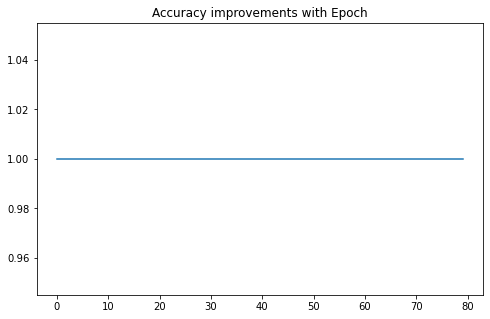


Evaluation against Test Dataset :
------------------------------------
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [45]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=4
#Set number of epochs
EPOCHS=80
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

##### Saving and Loading Models  

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction   

In [46]:
#Saving a model
    
model.save("disease_save")

 
    
#Loading a Model 
loaded_model = keras.models.load_model("disease_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: disease_save\assets


INFO:tensorflow:Assets written to: disease_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               2304      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Hidden-Layer-3 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 41)                5289      
                                                                 
Total params: 40,617
Trainable params: 40,617
Non-trainable params: 0
_________________________________________________________________


####  Predictions with Deep Learning Models

In [47]:
#Raw prediction data
prediction_input = [[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
pred = label_encoder.inverse_transform([prediction])
print("Prediction is ", pred )

Raw Prediction Output (Probabilities) : [[0.0000000e+00 2.7399136e-16 5.6425598e-25 0.0000000e+00 2.4385160e-19
  0.0000000e+00 1.9302297e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.7017804e-27 0.0000000e+00 0.0000000e+00 8.5776593e-25 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9135460e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6111254e-29 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.7532997e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00]]
Prediction is  ['Urinary tract infection']


In [48]:
print(pred)

['Urinary tract infection']
